## Finetuning a network

## Acknowledgement:


---



The codes are based on a classifier code by Miguel A Martinez. Link to original source code: https://github.com/MiguelAMartinez/flowers-image-classifier)

For this Google Colab Report, I have modified Miguel's `model_ic.py` as well as `train.py` (modified parts are indicated inside the respective files). 

I have also create a file called `test.py` that allows me to run a saved model on a test set and report its accuracy. The content inside the `test.py` resembles that of `train.py` but is much shorter because I do not need much parameters like `train.py`. Lastly, I acknowledge that `test.py` calls methods from `model_ic.py` as well.


---

## Instructions to Grader:

I did not write separate code files for each sub task in this HW 3 Part 2. Instead, I modified the `make_NN` function in `model_ic.py` such that it takes in 3 extra arguments, which makes the function much more flexible to options such as pretraining and finetuning. To do this, I also modified `train.py` such that it can take in the 3 extra arguments (flags) mentioned above. Therefore, all I need to run all of the sub-tasks listed below are in those 2 files. 

You can look into the `model_ic.py` and `train.py` to see which parts I modified. I have clearly annotated all parts that I modified. Thank you.


1 Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


2 Upload the project files (https://github.com/MiguelAMartinez/flowers-image-classifier) to Google Drive (e.g., in this directory: MyDrive/flowers-image-classifier-master). 
Then go to the directory of this project.

In [ ]:
cd /content/gdrive/MyDrive/flowers-image-classifier-master


/content/gdrive/MyDrive/flowers-image-classifier-master


3 Train the network

## (1) Training with base DenseNet model (densenet169)

In [ ]:
!python train.py "./flowers" --gpu --pretrain True

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100% 54.7M/54.7M [00:00<00:00, 81.1MB/s]
Epoch: 1/1 -  Training Loss: 3.929 -  Validation Loss: 2.821 -  Validation Accuracy: 0.449
Epoch: 1/1 -  Training Loss: 2.222 -  Validation Loss: 1.371 -  Validation Accuracy: 0.733
model: densenet169 - hidden layers: [1024] - epochs: 1 - lr: 0.001
Run time: 22.524 min


## (1) Training with ResNet model (resnet101)

In [ ]:
!python train.py "./flowers" --gpu --pretrain True --arch resnet101

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth
100% 170M/170M [00:00<00:00, 230MB/s]
Epoch: 1/1 -  Training Loss: 3.975 -  Validation Loss: 2.880 -  Validation Accuracy: 0.370
Epoch: 1/1 -  Training Loss: 2.499 -  Validation Loss: 1.604 -  Validation Accuracy: 0.658
model: resnet101 - hidden layers: [1024] - epochs: 1 - lr: 0.001
Run time: 2.031 min


## (2) Training with densenet169 with different training methods:

#### A) Training from scratch (NO PRETRAIN) & finetune whole model

In [ ]:
!python train.py "./flowers" --gpu --epochs 10 --finetune_whole True

Epoch: 1/10 -  Training Loss: 4.231 -  Validation Loss: 3.793 -  Validation Accuracy: 0.099
Epoch: 1/10 -  Training Loss: 3.720 -  Validation Loss: 3.424 -  Validation Accuracy: 0.153
Epoch: 2/10 -  Training Loss: 3.466 -  Validation Loss: 3.707 -  Validation Accuracy: 0.118
Epoch: 2/10 -  Training Loss: 3.358 -  Validation Loss: 3.214 -  Validation Accuracy: 0.177
Epoch: 2/10 -  Training Loss: 3.260 -  Validation Loss: 3.357 -  Validation Accuracy: 0.178
Epoch: 3/10 -  Training Loss: 3.050 -  Validation Loss: 2.985 -  Validation Accuracy: 0.226
Epoch: 3/10 -  Training Loss: 3.073 -  Validation Loss: 2.936 -  Validation Accuracy: 0.233
Epoch: 4/10 -  Training Loss: 2.983 -  Validation Loss: 2.850 -  Validation Accuracy: 0.238
Epoch: 4/10 -  Training Loss: 2.845 -  Validation Loss: 2.672 -  Validation Accuracy: 0.280
Epoch: 4/10 -  Training Loss: 2.762 -  Validation Loss: 2.706 -  Validation Accuracy: 0.284
Epoch: 5/10 -  Training Loss: 2.660 -  Validation Loss: 2.597 -  Validation Accu

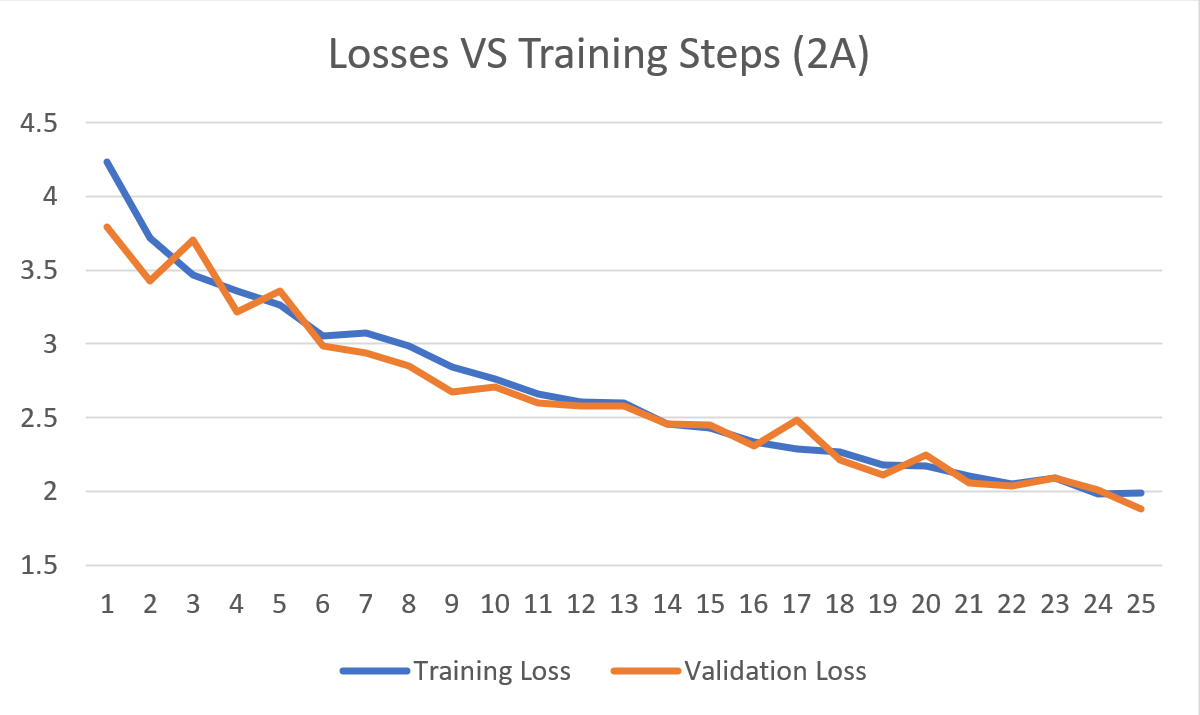

We can see clearly that both the training and validation losses are decreasing as training steps increase. The **loss decrease pattern** looks quite **linear** as you can see from the graph above. However, since this is a model that is trained from scratch, the **final loss** value after 25 training steps is **still quite high**, with Training Loss of 1.988 and Validation Loss of 1.882. The validation **accuracy is also still quite low** at 47.6% only


---



#### B) Pretrained but finetune only top layers (Same as part (1))

In [ ]:
!python train.py "./flowers" --gpu --epochs 10 --pretrain True --save_dir /content/gdrive/MyDrive/densenet169_model.pth

Epoch: 1/10 -  Training Loss: 3.918 -  Validation Loss: 2.812 -  Validation Accuracy: 0.509
Epoch: 1/10 -  Training Loss: 2.166 -  Validation Loss: 1.326 -  Validation Accuracy: 0.746
Epoch: 2/10 -  Training Loss: 1.216 -  Validation Loss: 0.781 -  Validation Accuracy: 0.832
Epoch: 2/10 -  Training Loss: 0.866 -  Validation Loss: 0.549 -  Validation Accuracy: 0.900
Epoch: 2/10 -  Training Loss: 0.683 -  Validation Loss: 0.433 -  Validation Accuracy: 0.913
Epoch: 3/10 -  Training Loss: 0.557 -  Validation Loss: 0.350 -  Validation Accuracy: 0.925
Epoch: 3/10 -  Training Loss: 0.455 -  Validation Loss: 0.321 -  Validation Accuracy: 0.939
Epoch: 4/10 -  Training Loss: 0.419 -  Validation Loss: 0.294 -  Validation Accuracy: 0.938
Epoch: 4/10 -  Training Loss: 0.351 -  Validation Loss: 0.278 -  Validation Accuracy: 0.937
Epoch: 4/10 -  Training Loss: 0.352 -  Validation Loss: 0.269 -  Validation Accuracy: 0.932
Epoch: 5/10 -  Training Loss: 0.324 -  Validation Loss: 0.256 -  Validation Accu

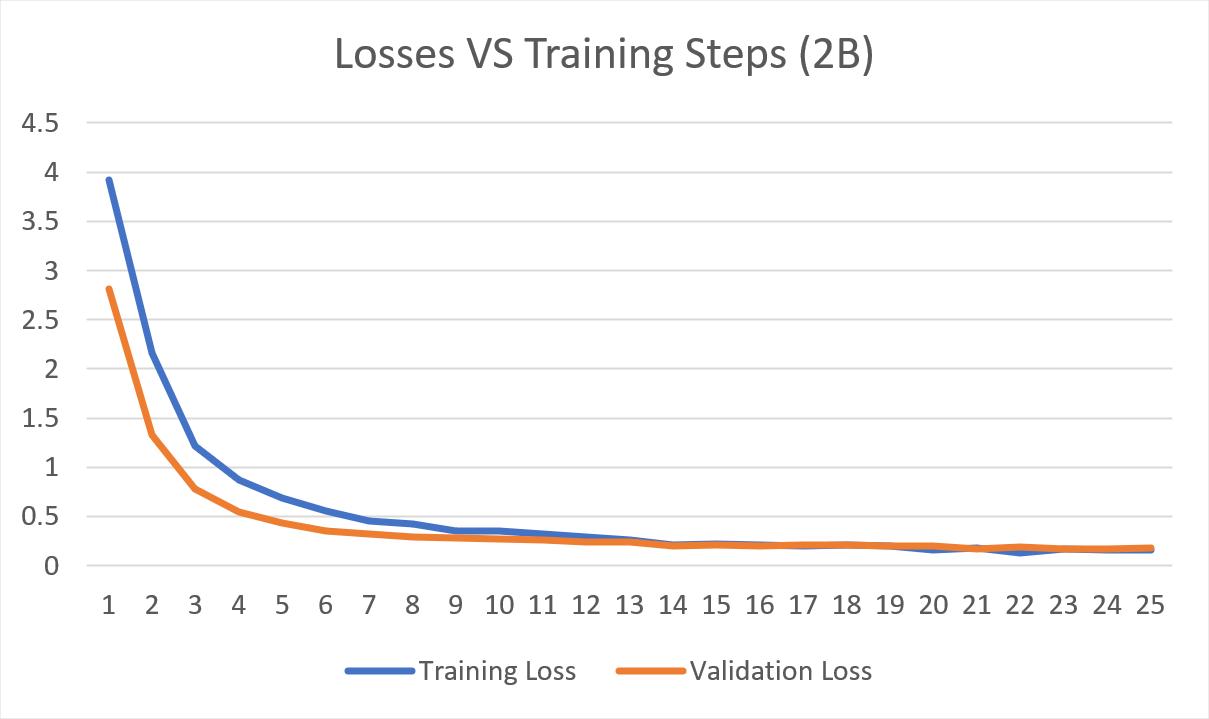

We can see clearly that both the training and validation losses are decreasing as training steps increase. The **loss decrease pattern** looks like an **exponential decay** (exponential decrease) as you can see from the graph above. The model performed very well after 25 training steps with **very low losses**. Last training loss is 0.162 and last validation loss is 0.178, with **very good validation accuracy** of 94.5%. Both the training and validation losses **steadily decrease** after every training step.


---



#### C) Pretrained and finetune whole model

In [ ]:
!python train.py "./flowers" --gpu --epochs 10 --pretrain True --finetune_whole True

Epoch: 1/10 -  Training Loss: 3.238 -  Validation Loss: 2.675 -  Validation Accuracy: 0.376
Epoch: 1/10 -  Training Loss: 1.527 -  Validation Loss: 1.222 -  Validation Accuracy: 0.655
Epoch: 2/10 -  Training Loss: 0.989 -  Validation Loss: 1.210 -  Validation Accuracy: 0.696
Epoch: 2/10 -  Training Loss: 0.781 -  Validation Loss: 0.749 -  Validation Accuracy: 0.801
Epoch: 2/10 -  Training Loss: 0.624 -  Validation Loss: 0.632 -  Validation Accuracy: 0.831
Epoch: 3/10 -  Training Loss: 0.500 -  Validation Loss: 0.507 -  Validation Accuracy: 0.860
Epoch: 3/10 -  Training Loss: 0.443 -  Validation Loss: 0.473 -  Validation Accuracy: 0.861
Epoch: 4/10 -  Training Loss: 0.386 -  Validation Loss: 0.599 -  Validation Accuracy: 0.855
Epoch: 4/10 -  Training Loss: 0.359 -  Validation Loss: 0.388 -  Validation Accuracy: 0.884
Epoch: 4/10 -  Training Loss: 0.338 -  Validation Loss: 0.476 -  Validation Accuracy: 0.870
Epoch: 5/10 -  Training Loss: 0.271 -  Validation Loss: 0.418 -  Validation Accu

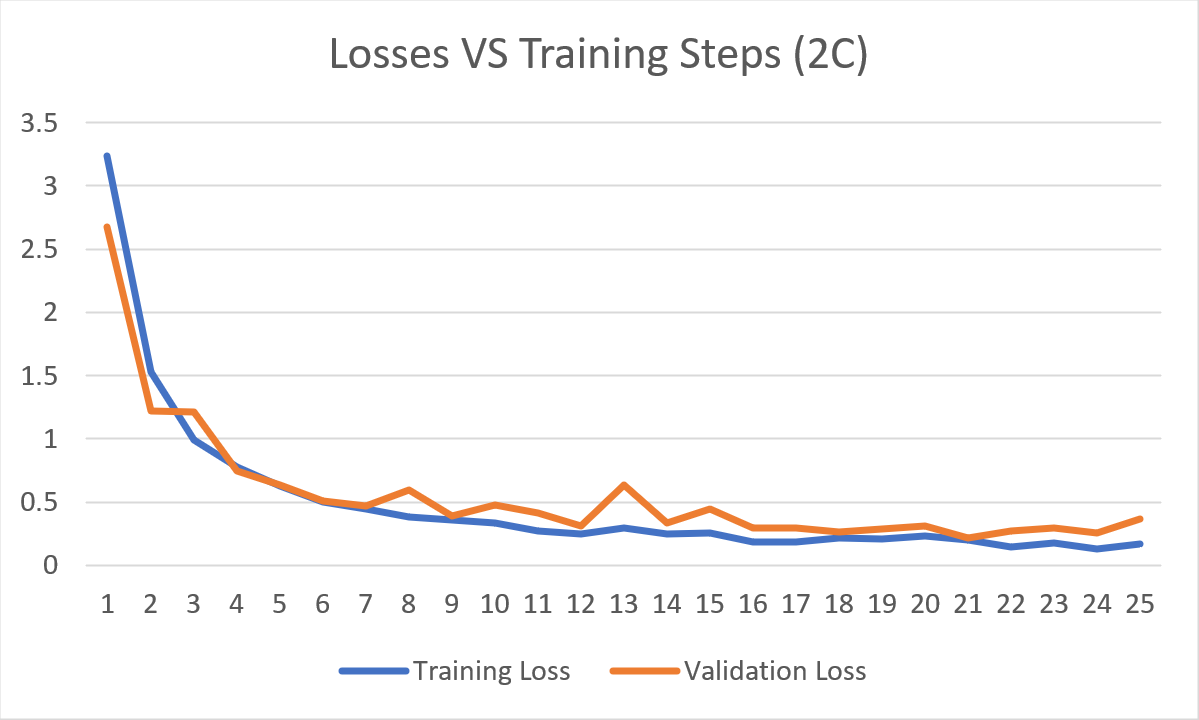

We can see clearly that both the training and validation losses are decreasing as training steps increase. The **loss decrease pattern** looks **somewhat** like an **exponential decay** (exponential decrease) but it is **not the same as model 2B above**. The model performed relatively well after 25 training steps with **low losses**. Last training loss is 0.168 and last validation loss is 0.365, with **good validation accuracy** of 91.2%. Model 2C seems to have **volatile changes in validation loss** (quite frequent ups and downs) even though its **training loss is constantly decreasing** in value. This is probably **caused by the finetuning of the whole model parameters** instead of just the last layer's parameters.


---



## (3) Densenet169 Test Set Performance (The model from part (2B) is saved and used here in test set)

In [ ]:
!python test.py "./flowers"

Testing Accuracy: 0.937


## (4) Custom Model (Convolutional Neural Network)

### First, use 2-layer Convolutional Neural Network

In [ ]:
!python train.py "./flowers" --epochs 10 --gpu --finetune_whole True --custom_model_with_layer 2 --arch customconv2

Using Two-Layer CNN
Epoch: 1/10 -  Training Loss: 4.339 -  Validation Loss: 4.008 -  Validation Accuracy: 0.064
Epoch: 1/10 -  Training Loss: 3.819 -  Validation Loss: 3.606 -  Validation Accuracy: 0.109
Epoch: 2/10 -  Training Loss: 3.423 -  Validation Loss: 3.280 -  Validation Accuracy: 0.155
Epoch: 2/10 -  Training Loss: 3.173 -  Validation Loss: 3.055 -  Validation Accuracy: 0.208
Epoch: 2/10 -  Training Loss: 3.110 -  Validation Loss: 2.996 -  Validation Accuracy: 0.224
Epoch: 3/10 -  Training Loss: 2.843 -  Validation Loss: 2.865 -  Validation Accuracy: 0.253
Epoch: 3/10 -  Training Loss: 2.800 -  Validation Loss: 2.769 -  Validation Accuracy: 0.259
Epoch: 4/10 -  Training Loss: 2.743 -  Validation Loss: 2.732 -  Validation Accuracy: 0.272
Epoch: 4/10 -  Training Loss: 2.542 -  Validation Loss: 2.678 -  Validation Accuracy: 0.294
Epoch: 4/10 -  Training Loss: 2.582 -  Validation Loss: 2.536 -  Validation Accuracy: 0.322
Epoch: 5/10 -  Training Loss: 2.412 -  Validation Loss: 2.67

### Second, use 5-layer Convolutional Neural Network

In [ ]:
!python train.py "./flowers" --epochs 10 --gpu --finetune_whole True --custom_model_with_layer 5 --arch customconv5

Using Five-Layer CNN
Epoch: 1/10 -  Training Loss: 4.540 -  Validation Loss: 4.436 -  Validation Accuracy: 0.042
Epoch: 1/10 -  Training Loss: 4.234 -  Validation Loss: 4.065 -  Validation Accuracy: 0.044
Epoch: 2/10 -  Training Loss: 3.989 -  Validation Loss: 3.896 -  Validation Accuracy: 0.076
Epoch: 2/10 -  Training Loss: 3.851 -  Validation Loss: 3.742 -  Validation Accuracy: 0.099
Epoch: 2/10 -  Training Loss: 3.667 -  Validation Loss: 3.507 -  Validation Accuracy: 0.118
Epoch: 3/10 -  Training Loss: 3.408 -  Validation Loss: 3.348 -  Validation Accuracy: 0.156
Epoch: 3/10 -  Training Loss: 3.276 -  Validation Loss: 3.214 -  Validation Accuracy: 0.159
Epoch: 4/10 -  Training Loss: 3.130 -  Validation Loss: 3.083 -  Validation Accuracy: 0.195
Epoch: 4/10 -  Training Loss: 3.003 -  Validation Loss: 2.997 -  Validation Accuracy: 0.223
Epoch: 4/10 -  Training Loss: 2.979 -  Validation Loss: 2.944 -  Validation Accuracy: 0.238
Epoch: 5/10 -  Training Loss: 2.879 -  Validation Loss: 2.8

## Short Analysis

After 25 training steps (10 epochs), we can see that the 2-layer Convolutional Neural Network performs slightly better than the 5-layer Convolutional Neural Network. The 2-layer CNN achieves 47.5% accuracy, 1.617 training loss and 2.018 validation loss after the 25 training steps while the 5-layer CNN achieves 44% accuracy, 1.956 training loss and 2.062 validation loss after 25 training steps.

This seems to confirm that more layers do not mean better accuracy unless you have a skip connection like ResNet where the neural network can learn deviations from identity layers.



---



4 Tasks

(Note: In this task, if you are adapting the code based on the open-source projects, pls acknowledge the original source in your code files, and also clearly mention it in your report. Also you need to clearly highlight which parts are done by yourself)

(1) Replace the used base model (densenet169) to another model (refer to https://pytorch.org/vision/0.8/models.html for more types of models). Pls compare the performance of these two models on the validation set. 

(2) Please try different training methods that use densenet169 as the base model (i.e., training the whole model from scratch, finetuning the model but only updating the top layers, finetuning the whole model), and compare their performance on the validation set. Please also draw the curves of training/validation losses over training steps for these methods, and give your analysis based on the observed curves.

(3) For the model based on densenet169, please also report its performance (when you use the training method of finetuning the model but only updating the top layers) on the testing set.

(4) Please replace the base model to a new model which contains some convolutional layers. You need to implement this new model by yourselves, and then report its performance on the validation set. Note, pls try different numbers of convolutional layers for your model, and compare their results, and give analysis for the results. You need to try at least 2 different numbers of conv layers.

Extra tasks (not included in Homework 3):

(5) Please try using two different learning rate scheduling schemes for densenet169, and compare the performance on the validation set.

(6) Please try using two different optimizers for densenet169, and compare the performance on the validation set.

# Hint
(1) For the densenet169 model, the final layer with parameters is the 'classifier'. Thus, we replaced 'model.classifier' to a new layer when doing transfer learning. But for other models, the name of the final layer with parameters may be different (e.g., 'fc' for the ResNet model, and thus you need to replace 'model.fc' to another layer if you want to use ResNet. You may refer to the "Transfer Learning
" section of https://learnopencv.com/image-classification-using-transfer-learning-in-pytorch/)

Note: you need to modify the make_NN function in model_ic.py

(2) If you want to finetune the whole model, you need to do two steps:
a) you should not freeze any parameter in the model;
b) in the optimizer (optim.Adam), you need to optimize all the parameters. You can refer to the "Transfer Learning" section of https://learnopencv.com/image-classification-using-transfer-learning-in-pytorch/, where the whole model is finetuned in that example. You can check the optim.Adam method used in that example.

(3) You need to modify the make_NN function to complete this task.

(4) You can refer to https://colab.research.google.com/drive/1zhDmMfSFBy3clH-NRp9nXruQXnckZ3X1#scrollTo=KZd049wKyFT8, where a new model is implemented, instead of loading a pre-trained model.